<a href="https://colab.research.google.com/github/ETS-Hashemi/project/blob/main/DGA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# To grant access to Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/')  # Adjust path as necessary

Mounted at /content/drive


In [3]:
# To load the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/dataset1.csv')

# Assuming the dataset has columns named 'X', 'Y', 'Z'
features = data[['X', 'Y', 'Z']].values

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reshape data for LSTM [samples, time steps, features]
# Assuming you want to use 100 time steps per sample
time_steps = 100
samples = int(len(scaled_features) / time_steps)

# Truncate the dataset to have a whole number of samples
trimmed_features = scaled_features[:samples * time_steps]

# Reshape to [samples, time steps, features]
lstm_input = trimmed_features.reshape(samples, time_steps, 3)

print("Shape of LSTM input:", lstm_input.shape)  # Output should be (n_samples, 100, 3)

Shape of LSTM input: (32, 100, 3)


In [22]:
print(f"Shape of data_features: {data_features.shape}")
print(f"Shape of data_labels: {data_labels.shape}")

Shape of data_features: (32, 90, 3)
Shape of data_labels: (32, 30)


Epoch 1/50
25/25 [==============================] - 2s 50ms/step - loss: 0.2956 - val_loss: 0.1878
Epoch 2/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2745 - val_loss: 0.1936
Epoch 3/50
25/25 [==============================] - 1s 42ms/step - loss: 0.1854 - val_loss: 0.1739
Epoch 4/50
25/25 [==============================] - 1s 43ms/step - loss: 0.1608 - val_loss: 0.1475
Epoch 5/50
25/25 [==============================] - 1s 42ms/step - loss: 0.1137 - val_loss: 0.1067
Epoch 6/50
25/25 [==============================] - 1s 42ms/step - loss: 0.0960 - val_loss: 0.0953
Epoch 7/50
25/25 [==============================] - 1s 42ms/step - loss: 0.0864 - val_loss: 0.0941
Epoch 8/50
25/25 [==============================] - 1s 42ms/step - loss: 0.0848 - val_loss: 0.0955
Epoch 9/50
25/25 [==============================] - 1s 43ms/step - loss: 0.0849 - val_loss: 0.0939
Epoch 10/50
25/25 [==============================] - 1s 43ms/step - loss: 0.0832 - val_loss: 0.0938
Epoch 11/

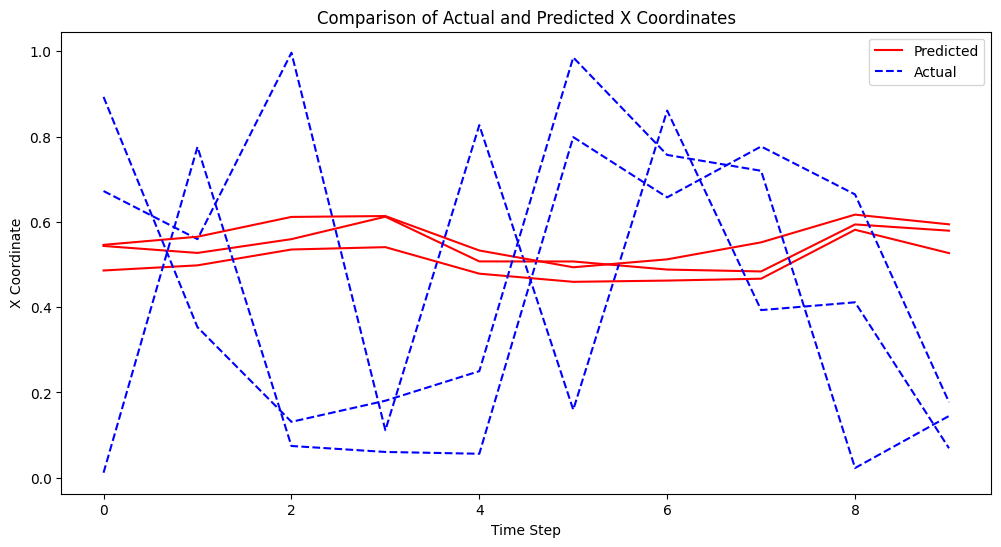

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(0)

# Simulating a dataset for demonstration purposes (replace with actual data loading)
data = np.random.rand(3200, 3)  # Simulating 3200 time steps with 3 features (X, Y, Z)

# Define sequence parameters
n_features = 3  # Features for X, Y, Z
n_steps = 100   # Total time steps per sample
n_samples = int(len(data) / n_steps)  # Calculate number of samples

# Reshape data to [samples, time steps, features]
lstm_input = data[:n_samples * n_steps].reshape(n_samples, n_steps, n_features)

# Splitting the data into training features and labels
data_features = lstm_input[:, :90, :]  # First 90 time steps as features
data_labels = lstm_input[:, 90:, :]    # Last 10 time steps as labels
data_labels = data_labels.reshape(data_labels.shape[0], -1)  # Flatten labels for training

# Split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    data_features, data_labels, test_size=0.2, random_state=42)

# Define and compile the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(90, n_features)),
    Dense(30)  # Predicting 10 time steps * 3 features (output)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_features, train_labels, epochs=50, batch_size=1, verbose=1, validation_data=(test_features, test_labels))

# Evaluate the model on the test set
test_loss = model.evaluate(test_features, test_labels, verbose=1)
print('Test loss:', test_loss)

# Making predictions
predictions = model.predict(test_features)
predictions = predictions.reshape(-1, 10, n_features)  # Reshape to original label shape
test_labels = test_labels.reshape(-1, 10, n_features)  # Reshape to original label shape

# Plotting the results for the X coordinate (first feature)
plt.figure(figsize=(12, 6))
for i in range(3):  # Plot the first 3 test samples
    plt.plot(predictions[i, :, 0], 'r-', label='Predicted' if i == 0 else "")
    plt.plot(test_labels[i, :, 0], 'b--', label='Actual' if i == 0 else "")
plt.title('Comparison of Actual and Predicted X Coordinates')
plt.xlabel('Time Step')
plt.ylabel('X Coordinate')
plt.legend()
plt.show()


In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                10800     
                                                                 
 dense_9 (Dense)             (None, 30)                1530      
                                                                 
Total params: 12330 (48.16 KB)
Trainable params: 12330 (48.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
25/25 [==============================] - 3s 53ms/step - loss: 10888.2197 - val_loss: 1020415.3750
Epoch 2/50
25/25 [==============================] - 1s 41ms/step - loss: 82567.2578 - val_loss: 0.2121
Epoch 3/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2165 - val_loss: 0.2167
Epoch 4/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2174 - val_loss: 0.2153
Epoch 5/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2155 - val_loss: 0.2134
Epoch 6/50
25/25 [==============================] - 1s 43ms/step - loss: 0.2133 - val_loss: 0.2113
Epoch 7/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2111 - val_loss: 0.2091
Epoch 8/50
25/25 [==============================] - 1s 43ms/step - loss: 0.2087 - val_loss: 0.2069
Epoch 9/50
25/25 [==============================] - 1s 43ms/step - loss: 0.2063 - val_loss: 0.2047
Epoch 10/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2039 - val_loss: 0.

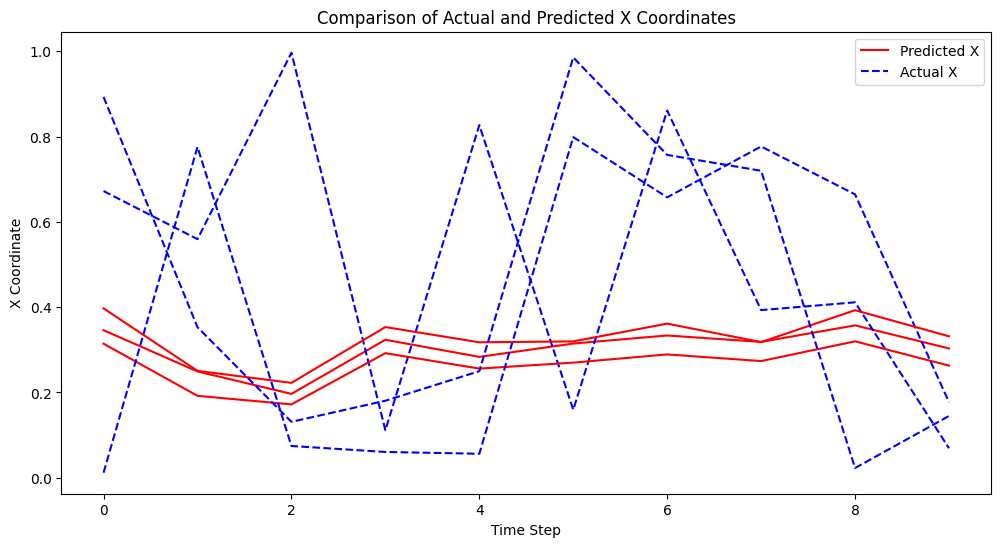

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Assuming data is already loaded and shaped into lstm_input
np.random.seed(0)
data = np.random.rand(3200, 3)  # Simulating data, replace with your data loading
n_features = 3
n_steps = 100
n_samples = int(len(data) / n_steps)
lstm_input = data[:n_samples * n_steps].reshape(n_samples, n_steps, n_features)

# Splitting data into features and labels
data_features = lstm_input[:, :90, :]  # First 90 steps as input features
data_labels = lstm_input[:, 90:, :]    # Last 10 steps as labels
data_labels = data_labels.reshape(data_labels.shape[0], -1)  # Flatten labels for training

train_features, test_features, train_labels, test_labels = train_test_split(
    data_features, data_labels, test_size=0.2, random_state=42)

# Custom loss function that calculates separate MSE for X, Y, Z and averages them
def custom_mse(y_true, y_pred):
    mse = MeanSquaredError()
    loss_x = mse(y_true[:, 0::3], y_pred[:, 0::3])  # MSE for X
    loss_y = mse(y_true[:, 1::3], y_pred[:, 1::3])  # MSE for Y
    loss_z = mse(y_true[:, 2::3], y_pred[:, 2::3])  # MSE for Z
    return (loss_x + loss_y + loss_z) / 3  # Average of MSEs

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(90, n_features)),
    Dense(30)  # 10 steps * 3 features
])

# Compile the model with custom MSE
model.compile(optimizer='adam', loss=custom_mse)

# Train the model
history = model.fit(train_features, train_labels, epochs=50, batch_size=1, verbose=1, validation_data=(test_features, test_labels))

# Evaluate the model
test_loss = model.evaluate(test_features, test_labels, verbose=1)
print('Test loss:', test_loss)

# Predictions for visualization
predictions = model.predict(test_features)
predictions = predictions.reshape(-1, 10, n_features)
test_labels = test_labels.reshape(-1, 10, n_features)

# Plotting predictions against actual values
plt.figure(figsize=(12, 6))
for i in range(3):  # First 3 test samples
    plt.plot(predictions[i, :, 0], 'r-', label='Predicted X' if i == 0 else "")
    plt.plot(test_labels[i, :, 0], 'b--', label='Actual X' if i == 0 else "")
plt.title('Comparison of Actual and Predicted X Coordinates')
plt.xlabel('Time Step')
plt.ylabel('X Coordinate')
plt.legend()
plt.show()


Epoch 1/50
25/25 [==============================] - 3s 54ms/step - loss: 16240.3799 - val_loss: 0.2050
Epoch 2/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2205 - val_loss: 0.2177
Epoch 3/50
25/25 [==============================] - 1s 42ms/step - loss: 0.2141 - val_loss: 0.1674
Epoch 4/50
25/25 [==============================] - 1s 42ms/step - loss: 0.1533 - val_loss: 0.1384
Epoch 5/50
25/25 [==============================] - 1s 42ms/step - loss: 0.1335 - val_loss: 0.1451
Epoch 6/50
25/25 [==============================] - 1s 45ms/step - loss: 0.1511 - val_loss: 0.1398
Epoch 7/50
25/25 [==============================] - 1s 43ms/step - loss: 0.1274 - val_loss: 0.1088
Epoch 8/50
25/25 [==============================] - 1s 44ms/step - loss: 0.1072 - val_loss: 0.1143
Epoch 9/50
25/25 [==============================] - 1s 42ms/step - loss: 0.1076 - val_loss: 0.1002
Epoch 10/50
25/25 [==============================] - 1s 41ms/step - loss: 0.0911 - val_loss: 0.0987
Epoch

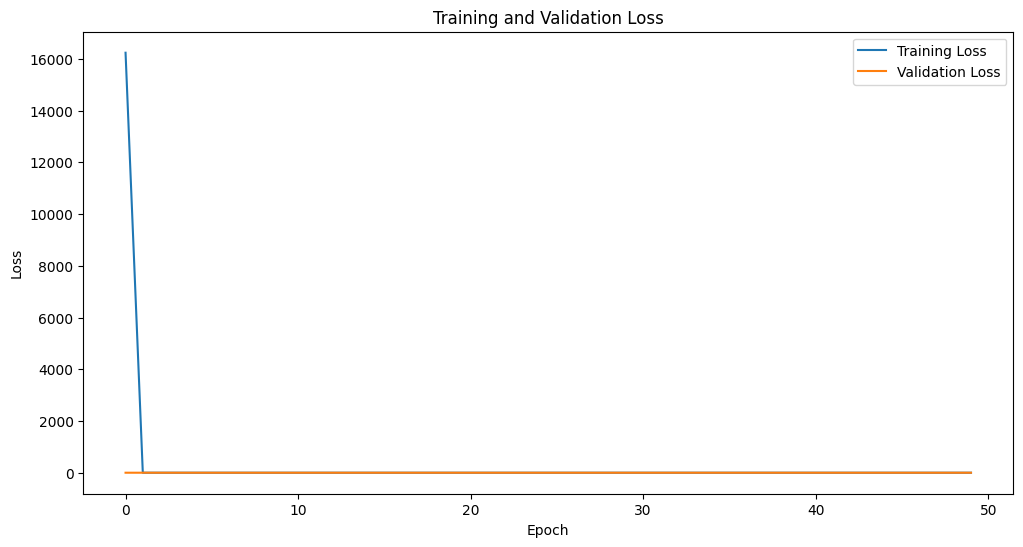

1/1 [==============================] - 0s 168ms/step


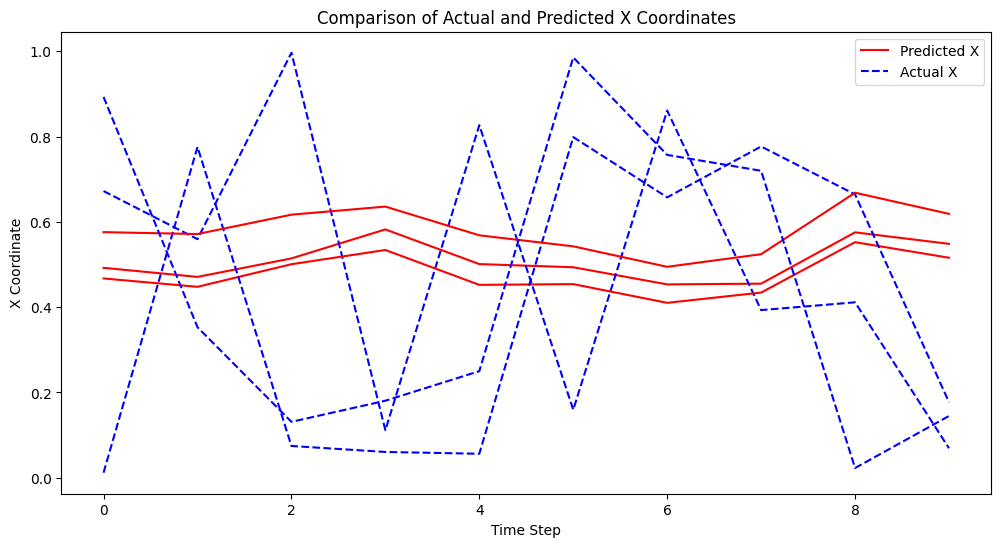

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Seed and data simulation setup (replace this with your actual data loading)
np.random.seed(0)
data = np.random.rand(3200, 3)
n_features = 3
n_steps = 100
n_samples = int(len(data) / n_steps)
lstm_input = data[:n_samples * n_steps].reshape(n_samples, n_steps, n_features)

# Data preparation
data_features = lstm_input[:, :90, :]
data_labels = lstm_input[:, 90:, :].reshape(data_labels.shape[0], -1)

# Split the data
train_features, test_features, train_labels, test_labels = train_test_split(
    data_features, data_labels, test_size=0.2, random_state=42)

# Custom MSE function
def custom_mse(y_true, y_pred):
    mse = MeanSquaredError()
    loss_x = mse(y_true[:, 0::3], y_pred[:, 0::3])
    loss_y = mse(y_true[:, 1::3], y_pred[:, 1::3])
    loss_z = mse(y_true[:, 2::3], y_pred[:, 2::3])
    return (loss_x + loss_y + loss_z) / 3

# Model definition
model = Sequential([
    LSTM(50, activation='relu', input_shape=(90, n_features)),
    Dense(30)  # Output layer
])
model.compile(optimizer='adam', loss=custom_mse)

# Train the model
history = model.fit(train_features, train_labels, epochs=50, batch_size=1, verbose=1,
                    validation_data=(test_features, test_labels))

# Model evaluation
test_loss = model.evaluate(test_features, test_labels, verbose=1)
print('Test loss:', test_loss)

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions for visualization
predictions = model.predict(test_features)
predictions = predictions.reshape(-1, 10, n_features)
test_labels = test_labels.reshape(-1, 10, n_features)

# Plot actual vs predicted for the first feature (X coordinate)
plt.figure(figsize=(12, 6))
for i in range(3):  # Plotting the first 3 test samples
    plt.plot(predictions[i, :, 0], 'r-', label='Predicted X' if i == 0 else "")
    plt.plot(test_labels[i, :, 0], 'b--', label='Actual X' if i == 0 else "")
plt.title('Comparison of Actual and Predicted X Coordinates')
plt.xlabel('Time Step')
plt.ylabel('X Coordinate')
plt.legend()
plt.show()
